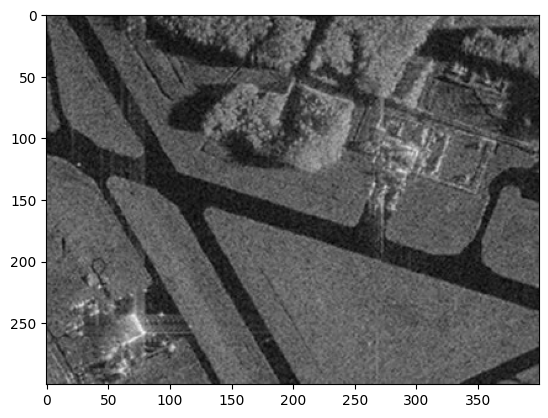

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage

image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

plt.imshow(image_gray, cmap="gray")

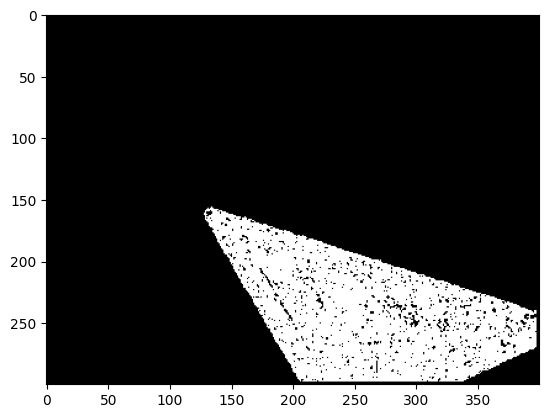

In [4]:
import math
def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(img[mask > 0])
                                                            
    if abs(av_val - img[point]) <= T:
        return True
    
    return False

def region_growing(image, seed_point,homo_fun,r, T):
    mask = np.zeros(image_gray.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image_gray.shape, np.uint8)
        for i in range(r,image.shape[0] - r):
            for j in range(r,image.shape[1] - r):
                if mask[i,j]==0 and mask[i - r:i + r, j-r: j+r].sum() > 0:
                    if homo_fun(image, mask, (i,j), T):
                        local_mask[i,j] = 1
        count = np.count_nonzero(local_mask)
        mask += local_mask
        
    return mask*255

seed_point = (250,250)
mask = region_growing(image_gray,seed_point,homo_average,2, 15)

plt.imshow(mask, cmap="gray")

In [ ]:
#2
#a)
flags = cv2.KMEANS_RANDOM_CENTERS


z = image_gray.reshape((-1,3))
# convert to np.float32
z = np.float32(z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((image_gray.shape))
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(res2, cmap="gray")

#b)
local_std = ndimage.generic_filter(image_gray.astype(np.float64), np.std, size=15)
    
mean_local_std = np.mean(local_std)
homogeneity = 1.0 / (1.0 + mean_local_std/255.0)
plt.subplot(2, 2, 2)
plt.imshow(local_std, cmap="gray")

#c)
image_norm = image_gray.astype(np.float64) / 255.0
       
grad_x = ndimage.sobel(image_norm, axis=0)
grad_y = ndimage.sobel(image_norm, axis=1)
gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    
hist, _ = np.histogram(gradient_magnitude.flatten(), bins=256, range=(0, 1))
hist = hist[hist > 0] 
prob = hist / hist.sum()
entropy = -np.sum(prob * np.log2(prob))
    
homogeneity = 1.0 / (1.0 + entropy)
plt.subplot(2, 2, 3)
plt.imshow(gradient_magnitude, cmap="gray")

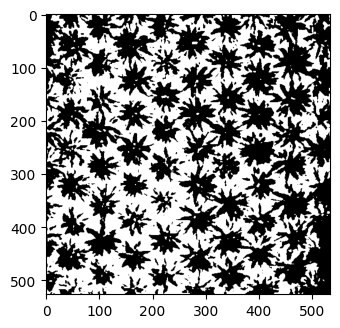

Количество пальмовых деревьев: 111


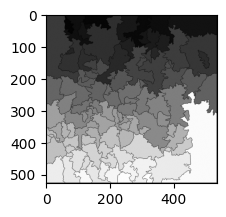

In [ ]:
image = cv2.imread('palm_1.jpg')
image_gray_2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(image_gray_2, cmap="gray")

blurred = cv2.GaussianBlur(image_gray_2, (5, 5), 0)
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.imshow(binary, cmap="gray")
plt.show()

ret, thresh = cv2.threshold(image_gray_2,0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5) 
ret, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, 0)
sure_fg = sure_fg.astype(np.uint8)
ret, markers = cv2.connectedComponents(sure_fg) 
result_image = image.copy()
_, markers = cv2.connectedComponents(sure_fg)
markers = cv2.watershed(result_image, markers.astype(np.int32))
result_image[markers == -1] = [0, 0, 255]
palm_count = len(np.unique(markers)) - 1

plt.subplot(2, 2, 2)
plt.imshow(markers, cmap="gray")
print(f"Количество пальмовых деревьев: {palm_count}")